In [1]:
import sys
sys.path.append('../')

import os

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
import seaborn as sns

pio.renderers.default = "png" # For GitHub rendering

# Escrow Inclusion Sweep Run Experiment

*Danilo Lessa Bernardineli, Shawn Anderson November 2023*

In this notebook, we run an escrow inclusion sweep run that compares two parameter sets. 


## Part 1. Running the Simulation

In [5]:
sim_df = pd.read_pickle(
    "../data/simulations/fund_inclusion-2023-12-21_21-35-29.pkl.gz"
)

In [6]:
sim_df.head()

,days_passed,blocks_passed,circulating_supply,user_supply,issued_supply,sum_of_stocks,block_utilization,dsf_relative_disbursal_per_day,reward_issuance_balance,other_issuance_balance,...,rewards_to_nominators,simulation,subset,run,timestep,delta_days,delta_blocks,average_compute_weight_per_budle,label,environmental_label
0,0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,1.320000e+09,1.680000e+09,...,0.0,0,0,1,0,NaN,NaN,NaN,default-issuance-function,standard
14,1,14400.0,13.698630,13.698630,1.680000e+09,3.000000e+09,0.000002,0.0,1.320000e+09,1.680000e+09,...,0.0,0,0,1,1,1.0,14400.0,1.000000e+10,default-issuance-function,standard
28,2,28800.0,27.363014,27.363014,1.680000e+09,3.000000e+09,0.000002,0.0,1.320000e+09,1.680000e+09,...,0.0,0,0,1,2,1.0,14400.0,1.000000e+10,default-issuance-function,standard
42,3,43200.0,54.675860,54.675928,1.680000e+09,3.000000e+09,0.000002,0.0,1.320000e+09,1.680000e+09,...,0.0,0,0,1,3,1.0,14400.0,1.000000e+10,default-issuance-function,standard
56,4,57600.0,81.896976,81.897279,1.680000e+09,3.000000e+09,0.000002,0.0,1.320000e+09,1.680000e+09,...,0.0,0,0,1,4,1.0,14400.0,1.000000e+10,default-issuance-function,standard


[Text(0.5, 1.0, 'AB Test Circulating Supply')]

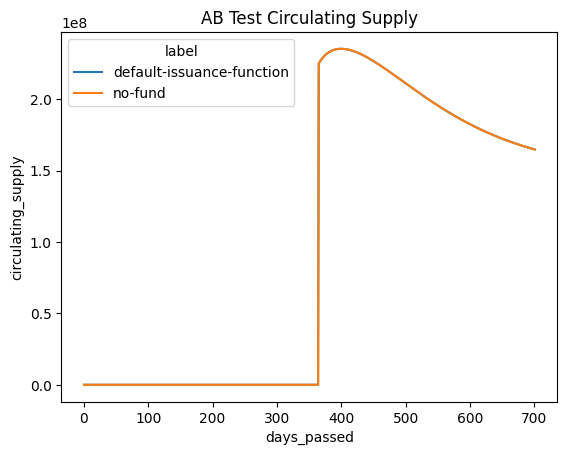

In [7]:
sns.lineplot(sim_df, x='days_passed', y='circulating_supply', hue='label').set(title='AB Test Circulating Supply')

[Text(0.5, 1.0, 'AB Test Operator Pool Shares')]

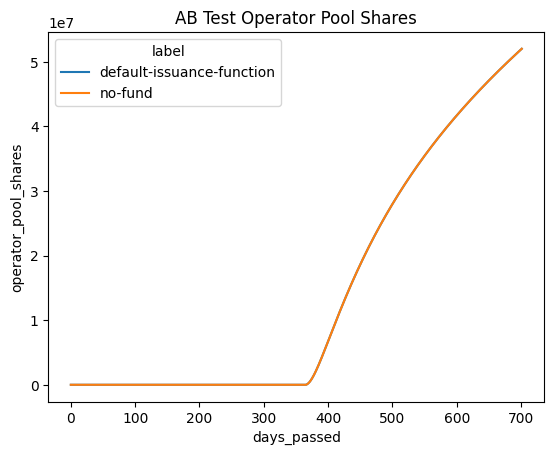

In [8]:
sns.lineplot(sim_df, x='days_passed', y='operator_pool_shares', hue='label').set(title='AB Test Operator Pool Shares')

[Text(0.5, 1.0, 'AB Test Nominator Pool Shares')]

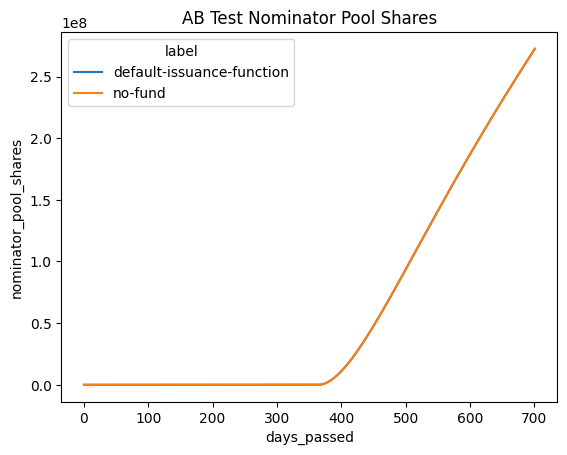

In [9]:
sns.lineplot(sim_df, x='days_passed', y='nominator_pool_shares', hue='label').set(title='AB Test Nominator Pool Shares')

[Text(0.5, 1.0, 'AB Test Block Utilization')]

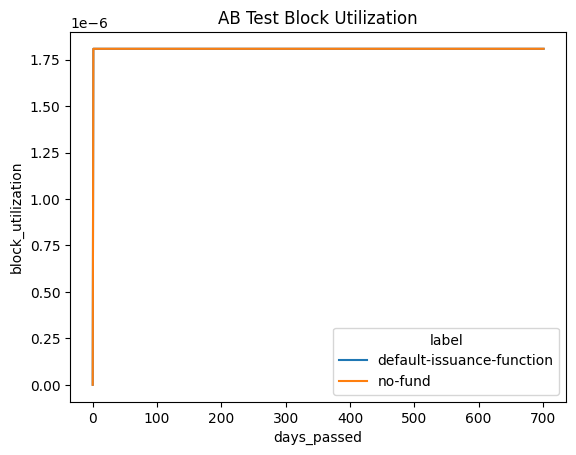

In [10]:
sns.lineplot(sim_df, x='days_passed', y='block_utilization', hue='label').set(title='AB Test Block Utilization')

[Text(0.5, 1.0, 'AB Test Windowed Volatility of Circulating Supply')]

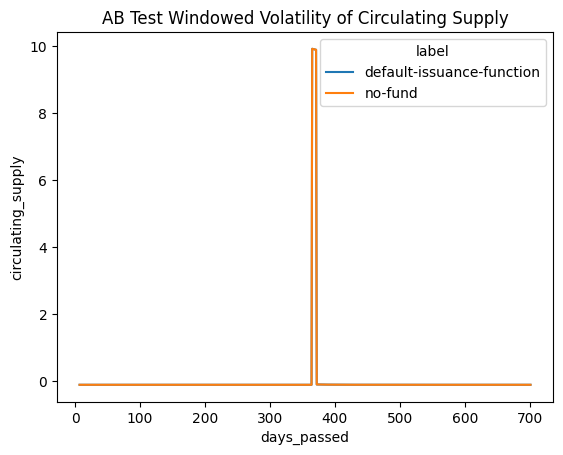

In [12]:
from subspace_model.trajectory_metrics import *


lst = []
for i, g_df in sim_df.set_index(['label', 'run', 'days_passed']).groupby('run'):
    s = window_volatility(g_df.circulating_supply.diff()).reset_index()
    lst.append(s)

df = pd.concat(lst).dropna()
sns.lineplot(df, x='days_passed', y='circulating_supply', hue='label').set(title='AB Test Windowed Volatility of Circulating Supply')